In [35]:
import os
import numpy as np
from mpc_utils import load_train_test_data_27s, load_train_test_data
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
x_train, y_train, x_test, y_test = load_train_test_data_27s(include_L=True)
l_train, l_test = x_train[:, :, 7:], x_test[:, :, 7:]
x_train, x_test = x_train[:, :, :7], x_test[:, :, :7]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, l_train.shape

((200, 1350, 7), (200, 1350, 1), (25, 1350, 7), (25, 1350, 1), (200, 1350, 1))

In [69]:
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
l = np.concatenate([l_train, l_test], axis=0)
low_thr = 0.12
up_thr = 0.415
tr_idx = (l[:,0,0] > low_thr) & (l[:,0,0] < up_thr)
te_idx = ~tr_idx
xtr, ytr, ltr = x[tr_idx], y[tr_idx], l[tr_idx]
xte, yte, lte = x[te_idx], y[te_idx], l[te_idx]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


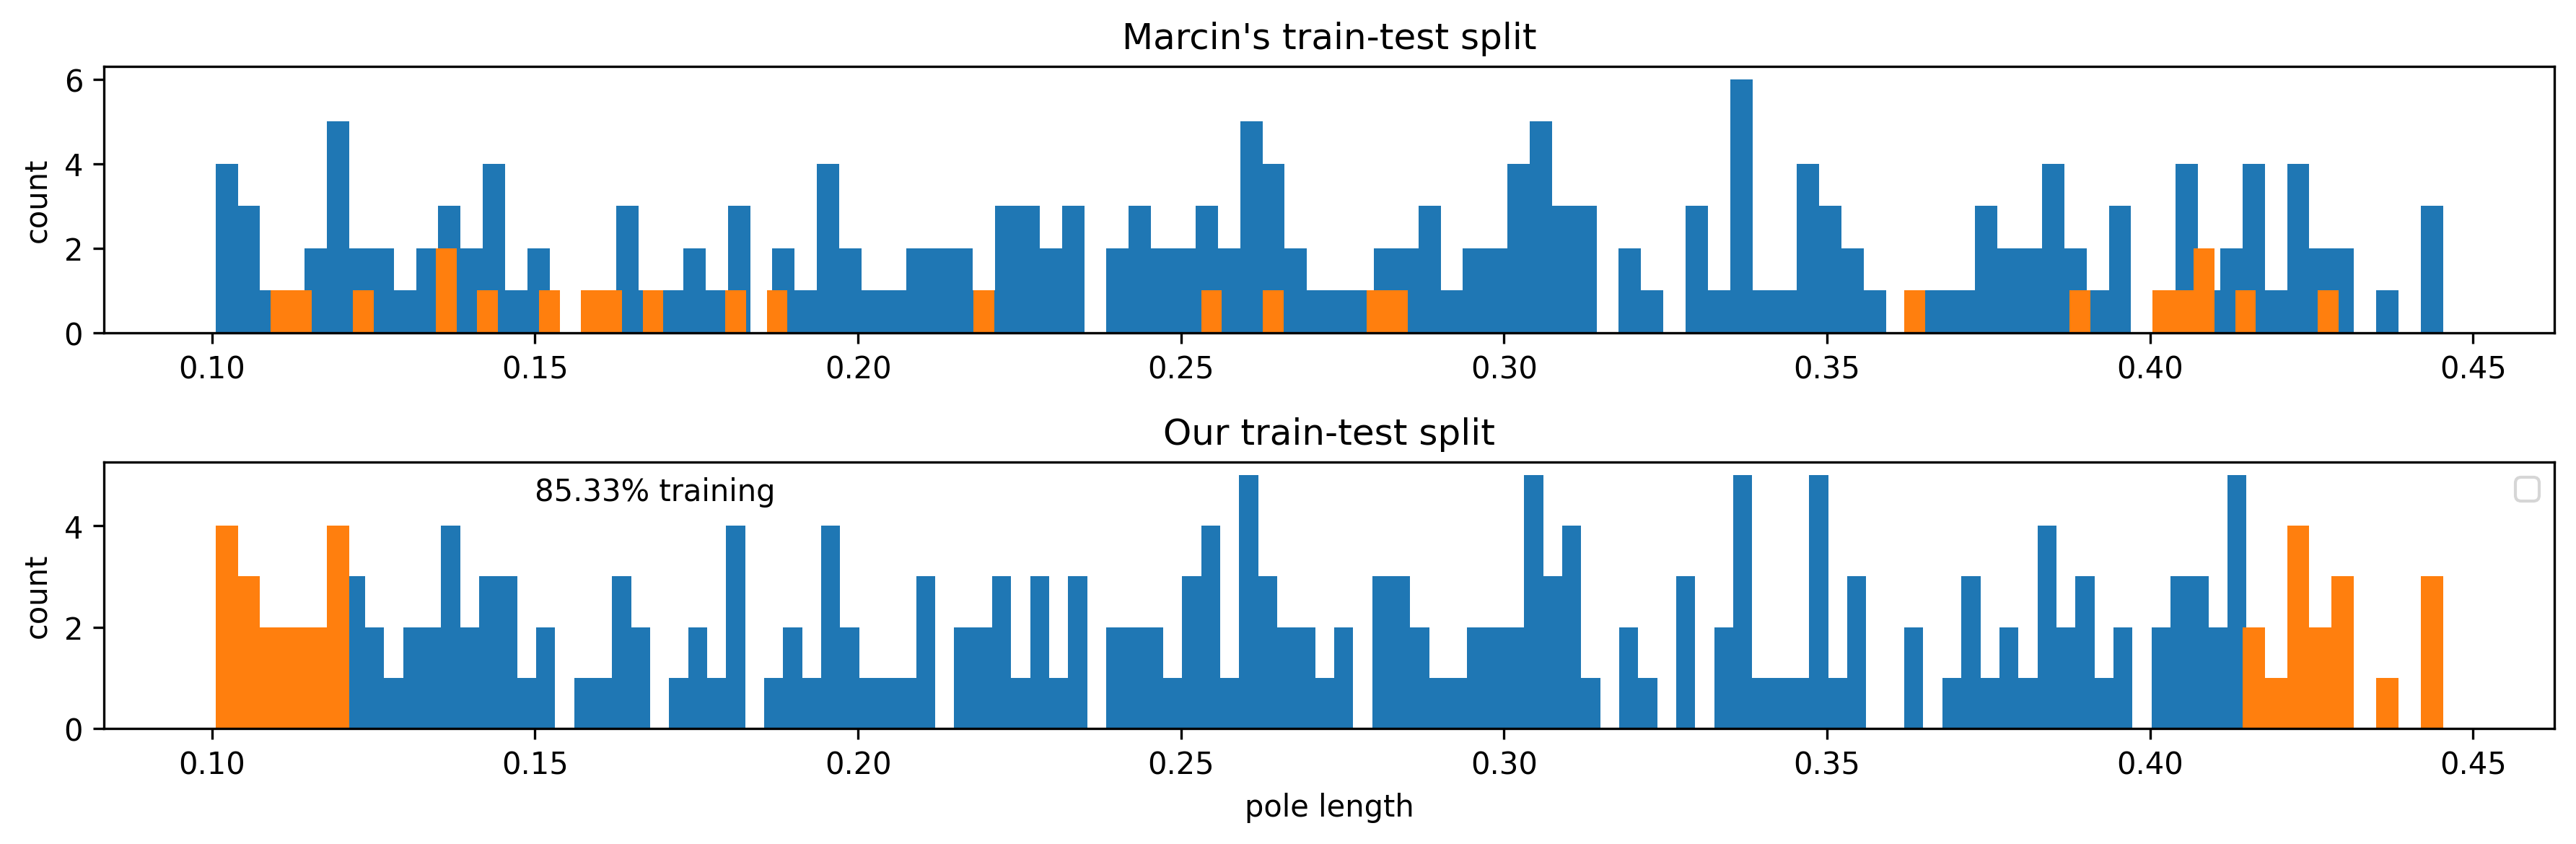

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(12, 4), dpi=300)
axs[0].set_title("Marcin's train-test split")
axs[1].set_title("Our train-test split")
axs[0].set_ylabel("count")
axs[1].set_ylabel("count")
axs[1].set_xlabel("pole length")
axs[1].legend()
axs[0].hist(l_train[:,0,0], bins=100)
axs[0].hist(l_test[:,0,0], bins=100)
axs[1].text(0.15, 4.5, f'{tr_idx.sum() / len(tr_idx):.2%} training')
axs[1].hist(ltr[:,0,0], bins=100, label='train')
axs[1].hist(lte[:,0,0], bins=100, label='test')
fig.tight_layout();

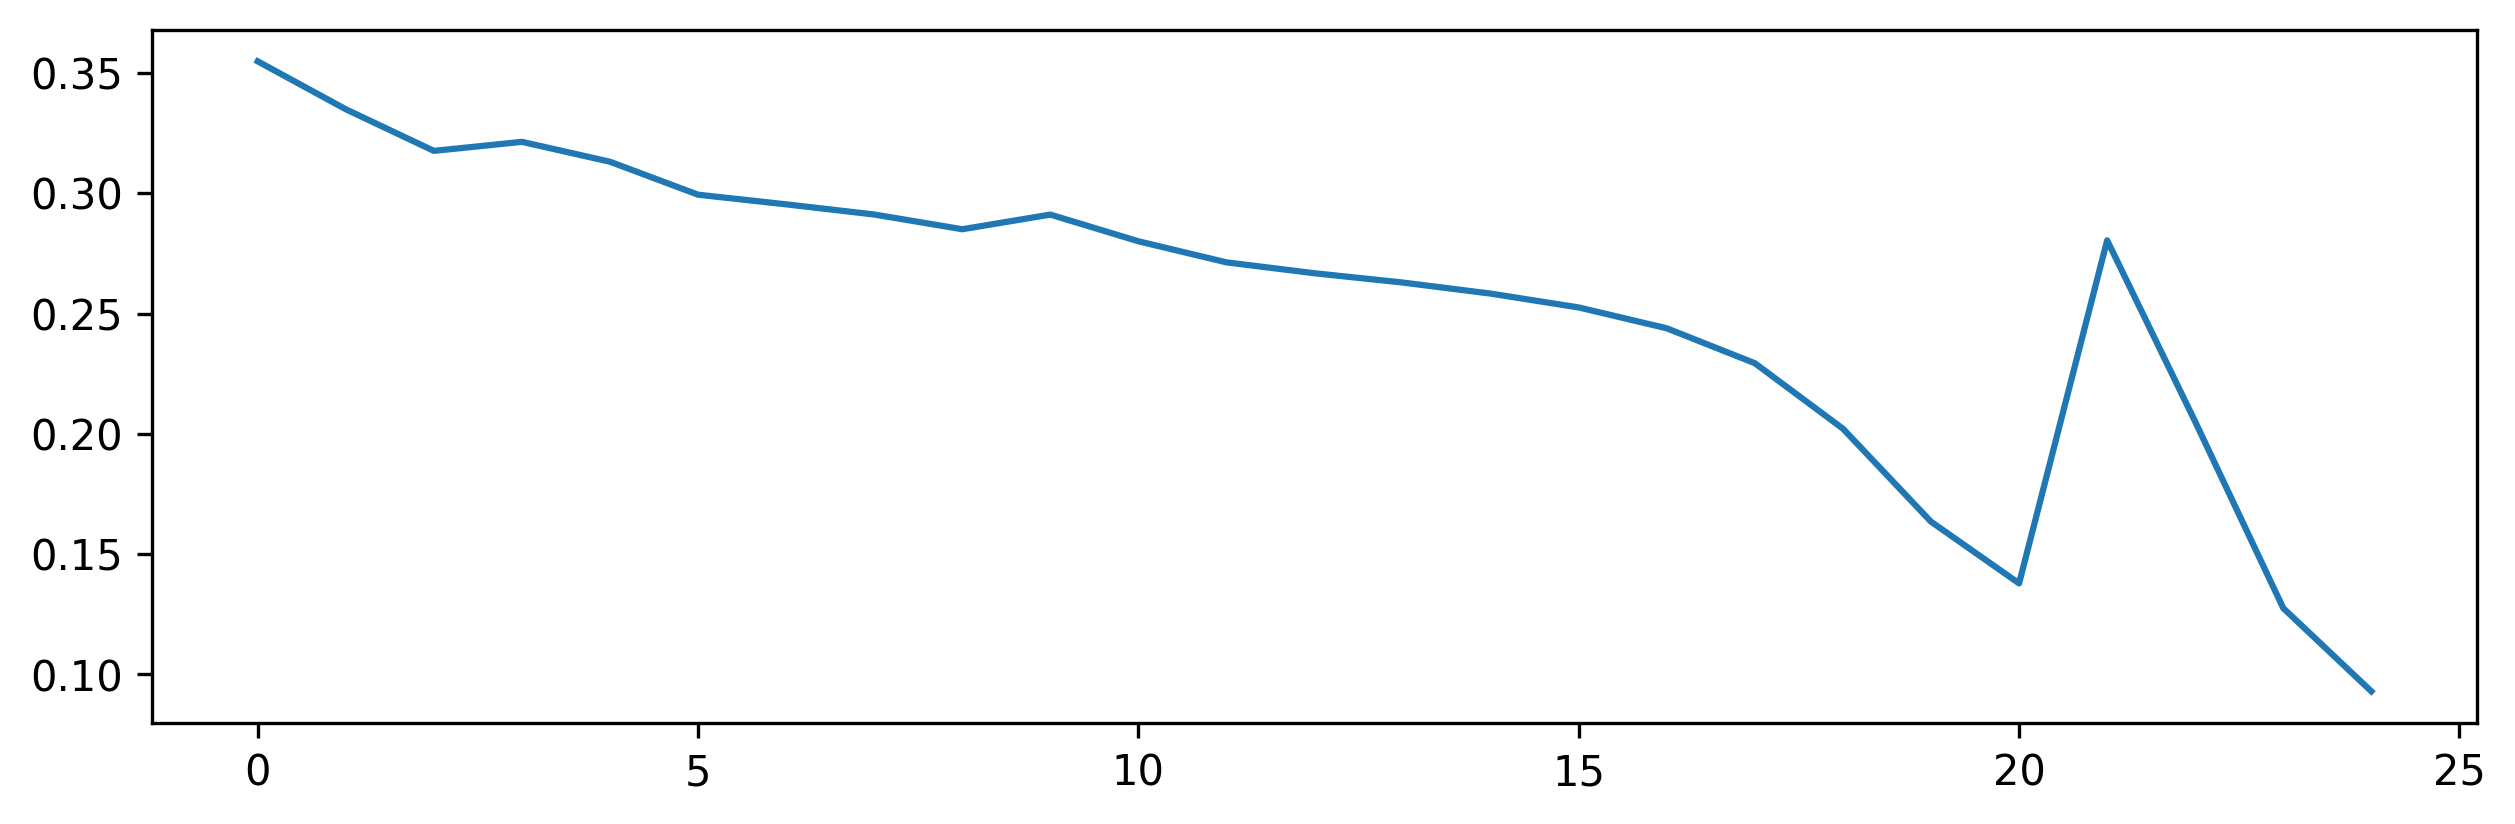

In [81]:
plt.plot(np.loadtxt('logs/mpc_plasticity/rp05x10-01x10_0709_2203/train_loss.txt'));

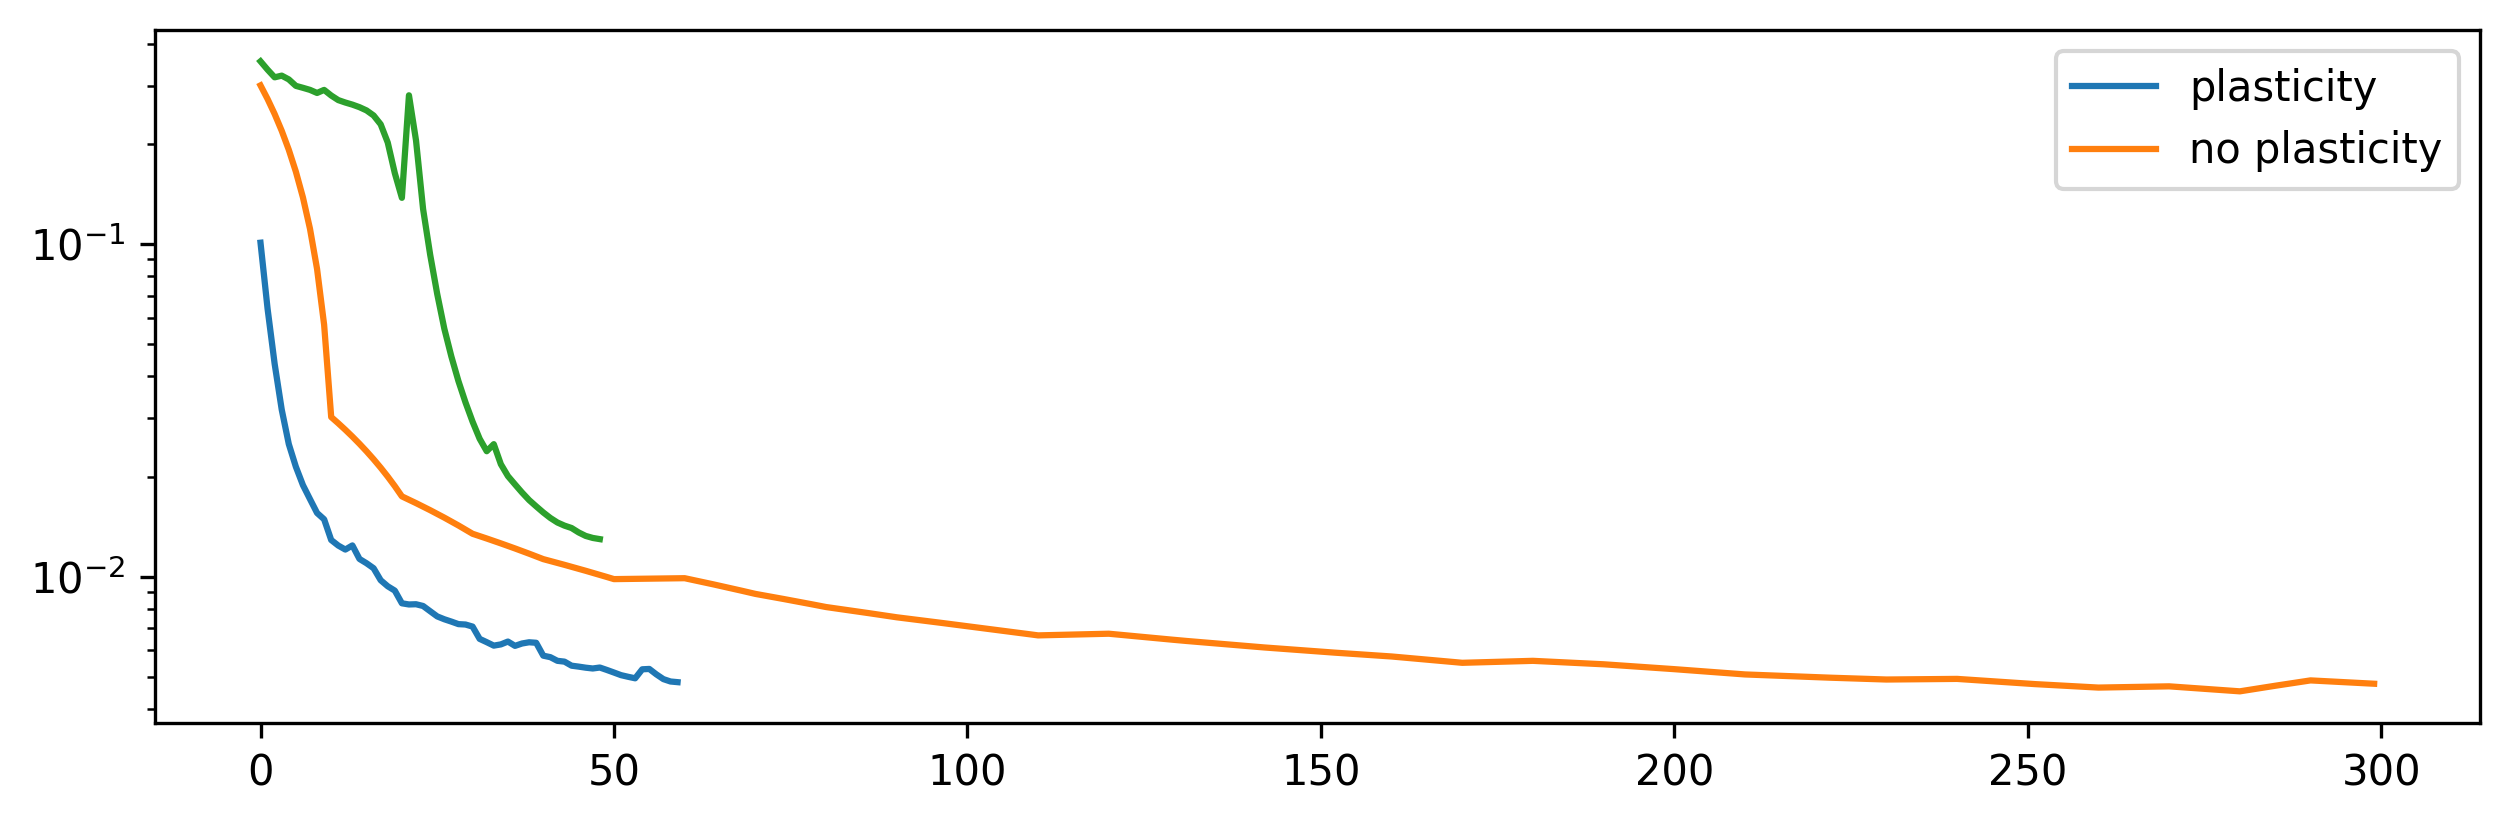

In [115]:
plasticity_loss = np.loadtxt('logs/mpc_plasticity/plasticity_loss.txt')
no_plasticity_loss = np.loadtxt('logs/mpc_plasticity/no_plasticity_loss.txt')
plt.plot(plasticity_loss[0], plasticity_loss[1], label='plasticity')
plt.plot(no_plasticity_loss[0], no_plasticity_loss[1], label='no plasticity')
plt.plot(np.loadtxt('logs/mpc_plasticity/rp05x10-01x10_0709_2203/train_loss.txt'))
plt.yscale('log')
plt.legend()
plt.show()